# Titanic Disaster Survival Classification
## Introduction:
The dataset about the Titanic disaster, extended with features derived from the Titanic passenger list available as of February 2019, provides valuable insights into the demographics and characteristics of the individuals aboard the ship. This dataset encompasses diverse information, including passenger details such as age, gender, ticket class, cabin, fare, and most notably, whether the individual survived or perished in the disaster.

<details>
<summary> Workflow for Titanic Dataset Analysis</summary>
<p>
1. **Import Packages:**
   - Import necessary Python libraries like pandas, numpy, matplotlib, seaborn, and scikit-learn.

2. **Load Train and Test Datasets:**
   - Load the Titanic dataset into separate train and test datasets.

3. **Visualize the Datasets:**
   - Explore and visualize the datasets using histograms, box plots, heatmaps, or other relevant plots to understand data distributions and relationships.

4. **Feature Engineering:**
   - Perform feature engineering tasks such as handling missing values, encoding categorical variables, creating new features, and scaling features if required.

5. **Feature Selection:**
   - Select relevant features that contribute most to the predictive model's performance using statistical methods or feature importance techniques.

6. **Model Building with Scikit-Learn:**
   - Build machine learning models using scikit-learn, including classifiers (e.g., Logistic Regression, Random Forest, etc.) for predicting survival on the Titanic.

7. **Conclusion:**
   - Conclude the entire analysis process, including code, observations, and insights gained during data exploration, feature engineering, model building, and evaluation.
</p>
</details>

### 1. Import Necessary dependencies

In [1]:
#For Data Handling
import numpy as np
import pandas as pd
from summarytools import dfSummary

#For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#For Model Building and selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

%matplotlib inline
np.set_printoptions(precision=5)

### 2. Data Exploration (EDA and Data Cleaning) 

#### 2.1 Loading Train Dataset

In [2]:
train = pd.read_csv("train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  WikiId       889 non-null    float64
 13  Name_wiki    889 non-null    object 
 14  Age_wiki     887 non-null    float64
 15  Hometown     889 non-null    object 
 16  Boarded      889 non-null    object 
 17  Destination  889 non-null    object 
 18  Lifeboat     345 non-null    object 
 19  Body    

In [4]:
dfSummary(train)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,PassengerId[int64],Mean (sd) : 446.0 (257.4)min < med < max:1.0 < 446.0 < 891.0IQR (CV) : 445.0 (1.7),891 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8g+/7EAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAB8ElEQVR4nO3Xv27aYBhH4ddWikxAtvhTuICO3ZBYuICOvdheBENnhi6d2JCQZYSbqBZ11yxJMVaTnuo8K/x4v+EMSdK2bUj/uvStHyBd4+6tH6D/R5Ikw4gY3Dj/2bbtw3Mf/jHUnsfTiPh147bvnnqb+u5sOp1+KopidMv4dDqVSZJ8eS7WF0NNkmQ4m80+53k+6Xr4crm8q+v6w3g8/p6mafOae+pt6rsjIpqmySLi43q9/jqfz09dtlVVZdvtdnI8HgcR0T3UiBjkeT7ZbDYPRVE8djm+3+8nu93u/Wq1+rZcLssu27576m3qu5/s77MsaxaLxY+u+4gYvvThVX+jFkXx2PV4WZbDiIjRaNR523dPvU1999P93+J//UIwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVgqEKwVCFYKhCMFQhGKoQDFUIhioEQxWCoQrBUIVgqEIwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVgqEKwVCFYKhCMFQhGKoQDFUIhioEQxWCoQrBUIVgqEIwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVwt01X6qqKuv6w+fzOYuIqOs6OxwO96+5p96mvrvv/pq+fgOe9DS+8Np05AAAAABJRU5ErkJggg=="">",0(0.0%)
2,Survived[float64],1. 0.02. 1.0,549 (61.6%)342 (38.4%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8g+/7EAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABNElEQVR4nO3bQWrDMBRF0a9iQjORMAYvJovoYrsI7cYYa9CETNRB9/Ak+u5ZwU+4GBL8Uu89AIUUEfeIuI0+xNi79/4cfYTCsm3bV855HX2Iq9bamVL6dghuyTmvj8fjWUp5jT7GzXVdn7XW9TiOW0T8/9giIkopr33ff0YfY+o++gCVj9EHwAexQYbYIENskCE2yBAbZIgNMsQGGWKDDLFBhtggQ2yQITbIEBtkiA0yS8TfS3yjD3Hk9r0vrbWz1rqG0Ut8M2mtnRHxHn2HAoOX8WwGL4kpH1Tcnmw2T5EZWU35nGZzM7KZ8rnN5mbkNuXjF/dA/KkLGWKDDLFBhtggQ2yQITbIEBtkiA0yxAYZYoMMsUGG2CBDbJAhNsgQG2RspnwOn3F2VlM+p9ncjBi8QOYXCltq37DnnSoAAAAASUVORK5CYII="">",0(0.0%)
3,Pclass[int64],Mean (sd) : 2.3 (0.8)min < med < max:1.0 < 3.0 < 3.0IQR (CV) : 1.0 (2.8),3 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8g+/7EAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABkklEQVR4nO3dUWoiQRiF0apBRF+6EcHFuIhZ7CzC3chQPkzCgPasILE1XWRucs5rW1I2H1IK+tdpmgr873589gZgjtVnb4Cvo9a6LaWsn1z+d5qml7cuCpVF1Fq3+/3+5zAMu2fWXy6X37XWX2/FKlSWsh6GYXc8Hl/GcXx9ZGFrbXM6nXbn83ldShEq/Y3j+Ho4HP48sXT73kUfpoggVCIIlQhCJYJQiSBUIgiVCEIlglCJIFQiCJUIQiWCUIkgVCIIlQhCJYJQiSBUIgiVCEIlglCJIFQiCJUIQiWCUIkgVCIIlQhCJYJQiSBUIgiVCEIlglCJIFQi3P1r9J6TLmCud0PtPekC5rr3jtp10gXMNWsqSq9JFzCX8T0dONcvT6gLc67vQ6jLc67vQKidONcvyxf+RBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqESY9SvU1trm0SdurW2u1+uqlDLUWh/eWLDhdrutvuE9+9DrvveYf4LcdwKKR7CqAAAAAElFTkSuQmCC"">",0(0.0%)
4,Name[object],"1. Braund, Mr. Owen Harris2. Boulos, Mr. Hanna3. Frolicher-Stehli, Mr. Maxmilli4. Gilinski, Mr. Eliezer5. Murdlin, Mr. Joseph6. Rintamaki, Mr. Matti7. Stephenson, Mrs. Walter Bertra8. Elsbury, Mr. William James9. Bourke, Miss. Mary10. Chapman, Mr. John Henry11. other",1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)881 (98.9%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8g+/7EAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADXElEQVR4nO3cwWkbYRRG0TdGOPZGQhhcQtKDi0ixKUJFpAdjPIvY8WaySBYpINwB5ZwK/sWFh2A+Ldu2DRRu9n4A/w+xkREbGbGRERsZsZERGxmxkREbGbGRuVmW5cuyLHd7P4TrdzMzn2fm094P4fo5o2TERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRG5mZmvs/Mz70fwvVb/IsRFWeUjNjIWFeRsa4i44ySERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZExeCFj8ELGGSUjNjIGL2QMXsg4o2TERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZAxeyBi8kHFGyYiNjNjIWFeRsa4i44ySERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZGxriJjXUXGGSUjNjIGL2QMXsg4o2TERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZAxeyBi8kHFGyYiNjMELGYMXMs4oGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZGxriJjXUXGGSUjNjLWVWSsq8g4o2TERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZAxeyBi8kHFGyYiNjMELGYMXMs4oGbGRERsZsZERGxmxkREbGbG

#### 2.2 Loading Test Dataset

In [5]:
test = pd.read_csv("test.csv")

test['Survived'] = np.NaN
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,...,928.0,"Kelly, Mr. James",19.0,"Unknown, Ireland",Southampton,New York City,NaN,70MB,3.0,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,...,1297.0,"Wilkes, Mrs. Ellen",47.0,"Penzance, Cornwall, England",Southampton,"Akron, Ohio, US",16,NaN,3.0,NaN
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,...,518.0,"Myles, Mr. Thomas Francis",63.0,"Fermoy, Ireland[note 1]",Queenstown,"Waban, Massachusetts, US",NaN,NaN,2.0,NaN
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,...,1303.0,"Wirz, Mr. Albert",27.0,"Uster, Switzerland",Southampton,"Beloit, Wisconsin, US",NaN,131MB,3.0,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,...,871.0,"Hirvonen, Mrs. Helga Elisabeth (née Lindqvist)",22.0,"Taalintehdas, Finland",Southampton,"Monessen, Pennsylvania, US",15,NaN,3.0,NaN


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  WikiId       415 non-null    float64
 12  Name_wiki    415 non-null    object 
 13  Age_wiki     415 non-null    float64
 14  Hometown     415 non-null    object 
 15  Boarded      415 non-null    object 
 16  Destination  415 non-null    object 
 17  Lifeboat     157 non-null    object 
 18  Body         43 non-null     object 
 19  Class   

In [7]:
dfSummary(test)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,PassengerId[int64],Mean (sd) : 1100.5 (120.8)min < med < max:892.0 < 1100.5 < 1309.0IQR (CV) : 208.5 (9.1),418 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8g+/7EAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACL0lEQVR4nO3Ysa6aYBiH8fcTj6ISiLHFzaVjkw6MXEQvtpdQE6/AoUsnNxNCINJjREqnjvWIVO2/eX6rvn7vF54w6Nq2NeBfN3j2AsA1hm99wTk3MbPRjb8/MLOfN872nT+1bft668FPvLfq3n3nL977YqjOuclisfgchuG866lN07xUVfUhCILvg8GgfvR8WZa5c+7LLQ/9mfdW3fve937rjToKw3CepulrFEXHLgfvdrv5drt9nyTJt+VymXeZ7TtfFIW/Xq/jLMveOefKrmebWRgEQZymafnIe6vu3Xe+KAp/s9nMsywbmdlNoZqZWRRFxziOf3Q5PM/ziZnZbDbrPNt3vqqql7quP61WK8/zvE4PzMysrmu/aZqP4/H46yPvrbr335g3s8mlD68KVc3pdBr6vj9NkuTY4+0wPZ/P3j32+xPVvR/hvwz1t75vh2dR3fue+HsKEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEobXfKkoCr/rDx8OB9/MrKoqf7/fTx85r3q26t5956/p6xcNclu+ajiPZwAAAABJRU5ErkJggg=="">",0(0.0%)
2,Pclass[int64],Mean (sd) : 2.3 (0.8)min < med < max:1.0 < 3.0 < 3.0IQR (CV) : 2.0 (2.7),3 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8g+/7EAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABkUlEQVR4nO3cUWoiQRSG0apBRF+6EcHFuIhZ7CzC3chQPkzCgPasILE1XWT+5JzXtqRsPoT7cus0TQX+dz8++wIwx+qzL8DXUWvdllLWTx7/O03Ty1sPhcoiaq3b/X7/cxiG3TPnL5fL71rrr7diFSpLWQ/DsDsejy/jOL4+crC1tjmdTrvz+bwupQiV/sZxfD0cDn+eOLp976FhighCJYJQiSBUIgiVCEIlglCJIFQiCJUIQiWCUIkgVCIIlQhCJYJQiSBUIgiVCEIlglCJIFQiCJUIQiWCUIkgVCIIlQhCJYJQiSBUIgiVCEIlwt21kz23CMNc74bae4swzHXvH7XrFmGYa9bG6V5bhGEuwxQR7PDvwAC6PKEuzADah1CXZwDtQKidGECXZZgiglCJIFQiCJUIQiWCUIkgVCIIlQhCJYJQiSBUIgiVCEIlglCJIFQiCJUIQiWCUIkgVCIIlQhCJYJQiSBUIgiVCLMWULTWNo9+cWttc71eV6WUodb68MWCDbfbbfUN39mHfve9z/wDVd53ApmtWDAAAAAASUVORK5CYII="">",0(0.0%)
3,Name[object],"1. Kelly, Mr. James2. Carr, Miss. Jeannie3. Dennis, Mr. William4. Rosblom, Miss. Salli Helena5. Touma, Miss. Maria Youssef6. Fleming, Miss. Honora7. Peacock, Master. Alfred Edward8. Oreskovic, Miss. Jelka9. Oxenham, Mr. Percy Thomas10. Ware, Mr. John James11. other",1 (0.2%)1 (0.2%)1 (0.2%)1 (0.2%)1 (0.2%)1 (0.2%)1 (0.2%)1 (0.2%)1 (0.2%)1 (0.2%)408 (97.6%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8g+/7EAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADaklEQVR4nO3cQUocYRRG0VfSGJ10I4JLSPbgIrLYLKIXkT2IWINonHQGIiQhs5Bb0Dln1rN/cOEh1OdyOp0GChdbP4D/h9jIiI2M2MiIjYzYyIiNjNjIiI2M2MhcLMvyaVmWq60fwvm7mJmPM/Nh64dw/pxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiNzMTNfZ+b71g/h/C3+ixEVZ5SM2MhYV5GxriLjjJIRGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkTF4IWPwQsYZJSM2MgYvZAxeyDijZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkDF7IGLyQcUbJiI2M2MhYV5GxriLjjJIRGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkbGuImNdRcYZJSM2MgYvZAxeyDijZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkDF7IGLyQcUbJiI2MwQsZgxcyzigZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkbGuImNdRcYZJSM2MtZVZKyryDijZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkDF7IGLyQcUbJiI2MwQsZgxcyzigZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmDFzIGL2ScUTJiIyM2MtZVZKyryDijZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkrKvIWFeRcUbJiI2MwQsZgxcyzigZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmDFzIGL2ScUTLLzFzPzOXWD+EsvZ5Op+f3H7vb29vP+/3+ZssXcZ7WdX1cluXLe3C7/X5/c39//3w4HF62fhzn4+np6ep4PN48PDxczsxbbDMzh8Ph5e7u7tumr+McXf/8wx8IZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZHYzb5+DbP0Qzsufmtqt6/p4PB5v5rfPQeBvrev6ODOv7799Fs6/9Mtn4dZVZPyBQEZsZMRGRmxkxEZGbGTERkZsZMRG5geWtG4kbAREDwAAAABJRU5ErkJggg=="">",0(0.0%)
4,Sex[object],1. male2. female,266 (63.6%)152 (36.4%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAA

### 3. Data Visualization
Divide the columns into numeric and categorical types to further analyse the data

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  WikiId       889 non-null    float64
 13  Name_wiki    889 non-null    object 
 14  Age_wiki     887 non-null    float64
 15  Hometown     889 non-null    object 
 16  Boarded      889 non-null    object 
 17  Destination  889 non-null    object 
 18  Lifeboat     345 non-null    object 
 19  Body    

In [9]:
train_num = train[['Age_wiki','Class' ,'Parch','Fare','SibSp','Survived']]
train_cat = train[['Sex','Cabin','Embarked','Ticket']]

#### 3.1 Operating the numerical columns

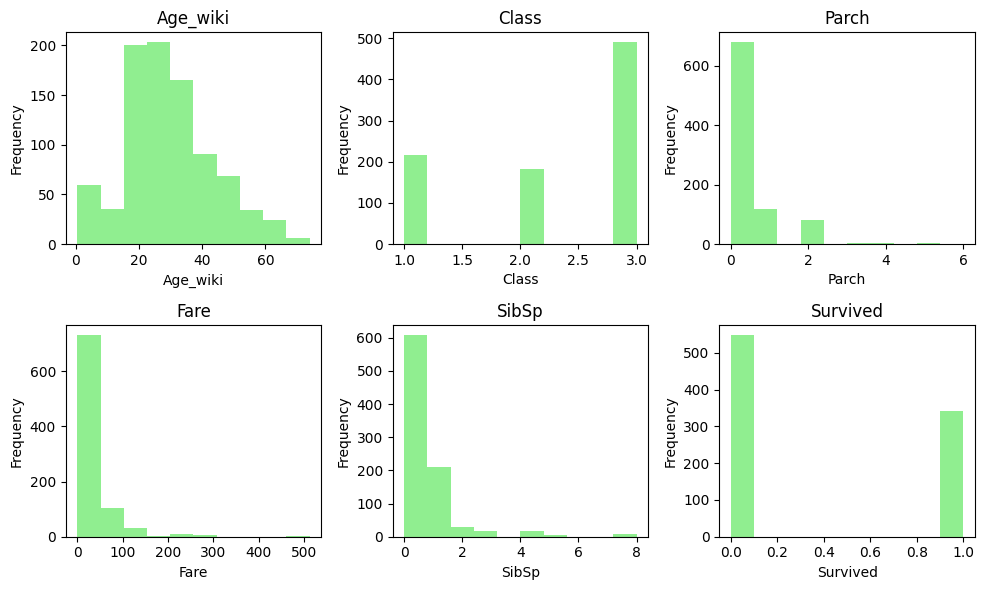

In [10]:
fig,axs = plt.subplots(2,3,figsize=(10,6)) 
axs = axs.flatten()                                 # Flatten the axs array to iterate over the subplots

#Plotting each column in a separate subplot
for i,col in enumerate(train_num.columns):
    axs[i].hist(train_num[col],color='lightgreen')
    axs[i].set_title(col)
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Frequency')    

#Adjust the layout and spacing
plt.tight_layout()
plt.show()

In [11]:
pd.pivot_table(data=train_num, values=["Age_wiki","Parch","Fare","SibSp"], index='Survived' )
#It gives the mean value of the different features mentioned

,Age_wiki,Fare,Parch,SibSp
Survived,,,,
0.0,29.869963,22.117887,0.329690,0.553734
1.0,28.444780,48.395408,0.464912,0.473684


#### 3.2 Operating the categorical columns 

In [12]:
train_cat = train[['Sex','Embarked',"Pclass",'Cabin','Ticket']]
train_cat

,Sex,Embarked,Pclass,Cabin,Ticket
0,male,S,3,NaN,A/5 21171
1,female,C,1,C85,PC 17599
2,female,S,3,NaN,STON/O2. 3101282
3,female,S,1,C123,113803
4,male,S,3,NaN,373450
...,...,...,...,...,...
886,male,S,2,NaN,211536
887,female,S,1,B42,112053
888,female,S,3,NaN,W./C. 6607
889,male,C,1,C148,111369


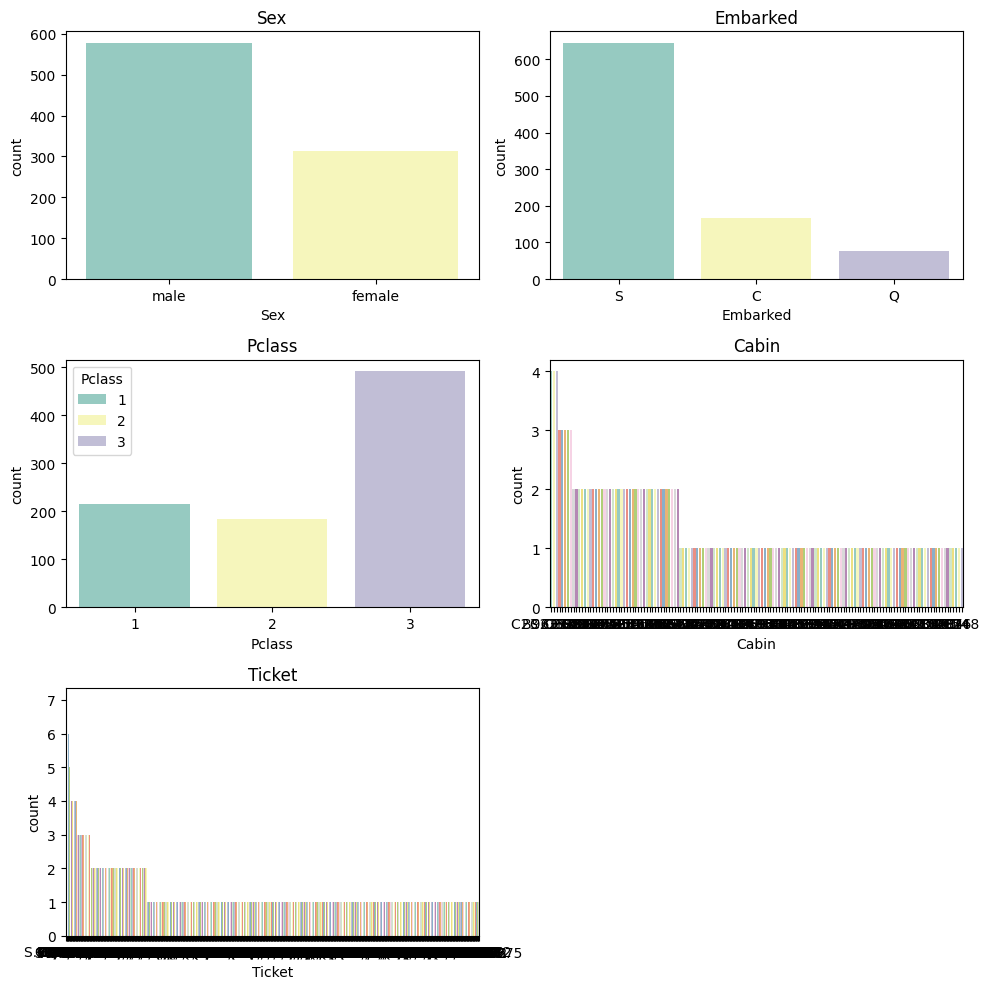

In [13]:
fig,axs = plt.subplots(3,2,figsize=(10,10))
for i, ax in enumerate(axs.flatten()):
    if i<len(train_cat.columns):
        x = train_cat.iloc[:,i].value_counts().index
        y = train_cat.iloc[:,i].value_counts()
        color = 'Set3'
        sns.barplot(x=x,y=y, hue=x, palette=color,ax=ax)
        ax.set_title(train_cat.columns[i])
    else:
        ax.axis('off')
    # plt.title(i)
    # plt.legend([],frameon=False)
plt.tight_layout()
plt.show()

In [14]:
pd.pivot_table(data=train, index='Survived',columns='Sex', values='Ticket', aggfunc='count')

Sex,female,male
Survived,,
0.0,81,468
1.0,233,109


In [15]:
pd.pivot_table(data=train, index='Survived', columns='Pclass', values='Ticket', aggfunc='count')

Pclass,1,2,3
Survived,,,
0.0,80,97,372
1.0,136,87,119


In [16]:
pd.pivot_table(data=train, index='Survived', columns='Embarked', values='Ticket',aggfunc='count')

Embarked,C,Q,S
Survived,,,
0.0,75,47,427
1.0,93,30,217


- aggfunc='count': This parameter specifies the aggregation function to be used when summarizing the data.
- In this case, the 'count' function is used to count the number of occurrences of 'Ticket' values for each combination of 'Survived' and 'Pclass', 'Sex', 'Embarked'.


### 4. Feature Engineering
- We can see that the cabin and Ticket columns are too clumsy to analyze. Thus, we apply feature engineering to these columns.
#### 4.1 Cabin
- We will separate cabin based on the names assigned, we assign 0 to NaN and 1 to cabin with names.

In [17]:
train['Cabin'].isna().sum()

687

In [18]:
train['cabin_new'] = [0 if i is np.NaN else 1 for i in train['Cabin']]
# train['cabin_new'] = train.Cabin.apply(lambda x: 0 if pd.isna(x) else 1)

In [19]:
train['cabin_new'].value_counts()

cabin_new
0    687
1    204
Name: count, dtype: int64

In [20]:
pd.pivot_table(data=train, index='Survived', columns='cabin_new',values='Ticket',aggfunc='count')

cabin_new,0,1
Survived,,
0.0,481,68
1.0,206,136


In [21]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,...,928.0,"Kelly, Mr. James",19.0,"Unknown, Ireland",Southampton,New York City,NaN,70MB,3.0,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,...,1297.0,"Wilkes, Mrs. Ellen",47.0,"Penzance, Cornwall, England",Southampton,"Akron, Ohio, US",16,NaN,3.0,NaN
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,...,518.0,"Myles, Mr. Thomas Francis",63.0,"Fermoy, Ireland[note 1]",Queenstown,"Waban, Massachusetts, US",NaN,NaN,2.0,NaN
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,...,1303.0,"Wirz, Mr. Albert",27.0,"Uster, Switzerland",Southampton,"Beloit, Wisconsin, US",NaN,131MB,3.0,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,...,871.0,"Hirvonen, Mrs. Helga Elisabeth (née Lindqvist)",22.0,"Taalintehdas, Finland",Southampton,"Monessen, Pennsylvania, US",15,NaN,3.0,NaN


In [22]:
test['cabin_new'] = test.Cabin.apply(lambda x: 0 if pd.isna(x) else 1)
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class,Survived,cabin_new
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,...,"Kelly, Mr. James",19.0,"Unknown, Ireland",Southampton,New York City,NaN,70MB,3.0,NaN,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,...,"Wilkes, Mrs. Ellen",47.0,"Penzance, Cornwall, England",Southampton,"Akron, Ohio, US",16,NaN,3.0,NaN,0


#### 4.2 Age
- The age column has many null values. Thus, we fill the null values with the median age for both the test and train sets.

In [23]:
train.Age_wiki.isna().sum()
train['Age_wiki'].fillna(train.Age_wiki.median())
test['Age_wiki'].fillna(test.Age_wiki.median())

0      19.0
1      47.0
2      63.0
3      27.0
4      22.0
       ... 
413    23.0
414    39.0
415    43.0
416    34.0
417     4.0
Name: Age_wiki, Length: 418, dtype: float64

In [24]:
train.Class.isna().sum()
train['Class'].fillna(train.Class.median())
test['Class'].fillna(test.Class.median())

0      3.0
1      3.0
2      2.0
3      3.0
4      3.0
      ... 
413    3.0
414    1.0
415    3.0
416    3.0
417    3.0
Name: Class, Length: 418, dtype: float64

##### Let us check for null values for other columns. If there are any null values, we fill them with their median values or we drop those rows

In [25]:
print(sum(train['Embarked'].isnull()))
print(sum(test['Embarked'].isnull()))

2
0


### 5. Feature Selection
##### 5.1  Dropping irrelevant columns from the training and test dataset.

In [26]:
train.info()
train.drop(['Name_wiki','Name','WikiId','Ticket'], axis=1, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  WikiId       889 non-null    float64
 13  Name_wiki    889 non-null    object 
 14  Age_wiki     887 non-null    float64
 15  Hometown     889 non-null    object 
 16  Boarded      889 non-null    object 
 17  Destination  889 non-null    object 
 18  Lifeboat     345 non-null    object 
 19  Body    

In [27]:
test.info()
test.drop(['Name_wiki','Name','WikiId','Ticket'], axis=1, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  WikiId       415 non-null    float64
 12  Name_wiki    415 non-null    object 
 13  Age_wiki     415 non-null    float64
 14  Hometown     415 non-null    object 
 15  Boarded      415 non-null    object 
 16  Destination  415 non-null    object 
 17  Lifeboat     157 non-null    object 
 18  Body         43 non-null     object 
 19  Class   

##### 5.2 Selecting relevant features and separating target variable

In [28]:
features = ['Sex','Age_wiki','Class','cabin_new','Embarked','Parch','SibSp']
y_train = train['Survived']

train['Age_wiki'] = train['Age_wiki'].fillna(train['Age_wiki'].median())
train['Class'] = train['Class'].fillna(train['Class'].median())

test['Age_wiki'] = test['Age_wiki'].fillna(test['Age_wiki'].median())
test['Class'] = test['Class'].fillna(test['Class'].median())


##### 5.3 Creating dummy variables for categorical features

In [29]:
X_train = pd.get_dummies(train[features])
X_test = pd.get_dummies(test[features])

In [30]:
X_train, X_test

(     Age_wiki  Class  cabin_new  Parch  SibSp  Sex_female  Sex_male  \
 0        22.0    3.0          0      0      1       False      True   
 1        35.0    1.0          1      0      1        True     False   
 2        26.0    3.0          0      0      0        True     False   
 3        35.0    1.0          1      0      1        True     False   
 4        35.0    3.0          0      0      0       False      True   
 ..        ...    ...        ...    ...    ...         ...       ...   
 886      27.0    2.0          0      0      0       False      True   
 887      19.0    1.0          1      0      0        True     False   
 888       7.0    3.0          0      2      1        True     False   
 889      26.0    1.0          1      0      0       False      True   
 890      43.0    3.0          0      0      0       False      True   
 
      Embarked_C  Embarked_Q  Embarked_S  
 0         False       False        True  
 1          True       False       False  
 2   

##### 5.4 Visualizing correlation among features using a heatmap


<Axes: >

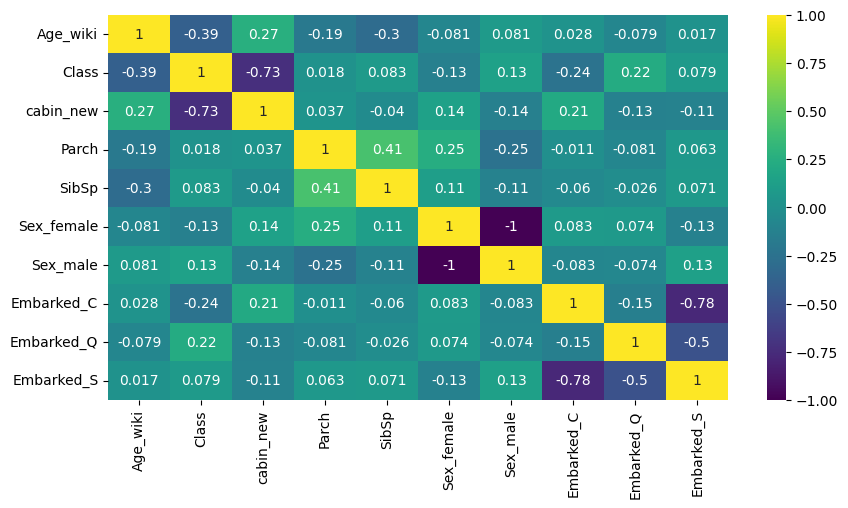

In [31]:
plt.figure(figsize=(10,5))
sns.heatmap(X_train.corr(),cmap='viridis',annot=True)

In [32]:
y_train

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 891, dtype: float64

### 6. Model Building using Scikit-Learn
In this section, various classifiers are imported from scikit-learn to build models:
- Logistic Regression for linear classification
- Decision Tree for non-linear classification 
- Random Forest for ensemble-based classification

**Cross-validation score**
- Additionally, the cross_val_score function from model_selection module is imported, which is used for evaluating models through cross-validation techniques.
- Cross-validation score helps in estimating the performance of the models by splitting the dataset into multiple subsets for training and testing.ing.ion

In [33]:
from sklearn.linear_model    import LogisticRegression
from sklearn.tree            import DecisionTreeClassifier
from sklearn.ensemble        import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.metrics import make_scorer,f1_score,precision_score,recall_score,accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, cross_validate

#### 6.1 Logistic Regression Model

In [34]:
model_lr = LogisticRegression(max_iter=2000)  # Instantiate Logistic Regression with a maximum iteration limit of 2000 to handle convergence.
model_lr.fit(X_train,y_train)                 # Fit the model using the training data (X_train) and corresponding target labels (y_train).
pred_lr = model_lr.predict(X_test)            # Predict the target labels for the test data (X_test)
y_pred_lr = np.array(pred_lr)                 # Convert the predicted target labels to a NumPy array for further analysis

In [35]:
# Counting predicted labels from Logistic Regression predictions
y_0_lr = np.count_nonzero(y_pred_lr == 0)
y_1_lr = np.count_nonzero(y_pred_lr == 1)
print(f"Logistic Regression\nSurvived: \t{y_1_lr}\nNot-Survived:   {y_0_lr}\n")

Logistic Regression
Survived: 	157
Not-Survived:   261



In [36]:
# Evaluating Logistic Regression model accuracy using cross-validation
score_lr = cross_val_score(model_lr,X_train,y_train, cv=5, scoring='accuracy')

# Displaying the mean accuracy of Logistic Regression model
print("Logistic Regression Accuracy : ",score_lr.mean())

Logistic Regression Accuracy :  0.7968489109283787


#### 6.2 Decision Tree Model

In [37]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train,y_train)
pred_dt = model_dt.predict(X_test)
y_pred_dt = np.array(pred_dt)

In [38]:
y_0_dt = np.count_nonzero(y_pred_dt == 0)
y_1_dt = np.count_nonzero(y_pred_dt == 1)
print(f"Decision Tree Classifier:\nSurvived:\t{y_1_dt}\nNot-Survived:   {y_0_dt}")

Decision Tree Classifier:
Survived:	153
Not-Survived:   265


In [39]:
score_dt = cross_val_score(model_dt,X_train,y_train, cv=5, scoring='accuracy')
print("Decision Tree Classifier Accuracy : ",score_dt.mean())

Decision Tree Classifier Accuracy :  0.7766681313163015


#### 6.3 Random Forest Model

In [40]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train,y_train)
pred_rf = model_rf.predict(X_test)
y_pred_rf = np.array(pred_rf)

In [41]:
y_0_rf = np.count_nonzero(y_pred_rf == 0)
y_1_rf = np.count_nonzero(y_pred_rf == 1)
print(f"Random Forest Classifier:\nSurvived:\t{y_1_rf}\nNot-Survived:   {y_0_rf}")

Random Forest Classifier:
Survived:	171
Not-Survived:   247


In [42]:
score_rf = cross_val_score(model_rf,X_train,y_train, cv=5, scoring='accuracy')
print("Random Forest Classifier Accuracy : ",score_rf.mean())

Random Forest Classifier Accuracy :  0.784545853995355


#### 6.4 Hist Gradient Boosting Model

In [43]:
model_hg = RandomForestClassifier()
model_hg.fit(X_train,y_train)
pred_hg = model_hg.predict(X_test)
y_pred_hg = np.array(pred_hg)

In [44]:
y_0_hg = np.count_nonzero(y_pred_hg == 0)
y_1_hg = np.count_nonzero(y_pred_hg == 1)
print(f"Hist Gradient Boosting Classifier:\nSurvived:\t{y_1_hg}\nNot-Survived:   {y_0_hg}")

Hist Gradient Boosting Classifier:
Survived:	159
Not-Survived:   259


In [45]:
score_hg = cross_val_score(model_hg,X_train,y_train, cv=5, scoring='accuracy')
print("Hist Gradient Boosting Classifier Accuracy : ",score_hg.mean())

Hist Gradient Boosting Classifier Accuracy :  0.7845709622748102


#### 6.2 Performance Metrics of different models

In [46]:
def mean_scores(model,X,y,cv=5):
    scoring = {'f1':make_scorer(f1_score),
              'precision':make_scorer(precision_score),
              'recall':make_scorer(recall_score),
              'accuracy':make_scorer(accuracy_score)}
    
    scores = cross_validate(model, X_train, y_train, cv=5,scoring=scoring)

    mean_scores = {'Accuracy': scores['test_accuracy'].mean(),
                   'F1 Score': scores['test_f1'].mean(),
                   'Precision': scores['test_precision'].mean(), 
                   'Recall': scores['test_recall'].mean()
                  }
    for metric,value in mean_scores.items():
        print(f"{metric}:{value}\n")

    return mean_scores

##### 6.2.1 Performance Metrics for Logistic Regression Model.

In [47]:
print("Performance Metrics for Logistic Regression Model.")
mean_scores_lr = mean_scores(model_lr,X_train,y_train)

Performance Metrics for Logistic Regression Model.
Accuracy:0.7968489109283787

F1 Score:0.7265840954040907

Precision:0.7521284271284271

Recall:0.7045609548167093



##### 6.2.2 Performance Metrics for Decision Tree Classification Model.

In [48]:
print("Performance Metrics for Decision Tree Classification Model.")
mean_scores_dt = mean_scores(model_dt,X_train,y_train)

Performance Metrics for Decision Tree Classification Model.
Accuracy:0.780051471972883

F1 Score:0.7084179325363082

Precision:0.7237672380202538

Recall:0.7015771526001705



##### 6.2.3 Performance Metrics for Random Forest Classification Model.

In [49]:
print("Performance Metrics for Random Forest CLassifier Model.")
mean_scores_rf = mean_scores(model_rf,X_train,y_train)

Performance Metrics for Random Forest CLassifier Model.
Accuracy:0.7812001757579562

F1 Score:0.7139647013359299

Precision:0.7168502196126119

Recall:0.7135123614663256



##### 6.2.4 Performance Metrics for Hist Gradient Boosting Classification Model.

In [50]:
print("Performance Metrics for Hist Gradient Boosting Classifier Model.")
mean_scores_hg = mean_scores(model_hg,X_train,y_train)

Performance Metrics for Hist Gradient Boosting Classifier Model.
Accuracy:0.7856820036407005

F1 Score:0.7191942656796471

Precision:0.7251585216407656

Recall:0.7164535379369138



### 7. Comparison of Accuracies for Different Models

In [51]:
print("Logistic Regression Accuracy : \t\t\t\t {:.4f}%".format(score_lr.mean() * 100))
print("Decision Tree Classifier Accuracy : \t\t\t {:.4f}%".format(score_dt.mean() * 100))
print("Random Forest Classifier Accuracy : \t\t\t {:.4f}%".format(score_rf.mean() * 100))
print("Hist Gradient Boosting Classifier Accuracy : \t\t {:.4f}%".format(score_hg.mean() * 100))

Logistic Regression Accuracy : 				 79.6849%
Decision Tree Classifier Accuracy : 			 77.6668%
Random Forest Classifier Accuracy : 			 78.4546%
Hist Gradient Boosting Classifier Accuracy : 		 78.4571%


In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Accuracies for different models
accuracies = {
    'Logistic Regression': mean_scores_lr['Accuracy'],
    'Decision Tree': mean_scores_dt['Accuracy'],
    'Random Forest': mean_scores_rf['Accuracy'],
    'Hist Gradient Boosting': mean_scores_hg['Accuracy']
}

# Extracting model names and accuracies
model_names = list(accuracies.keys())
model_accuracies = list(accuracies.values())

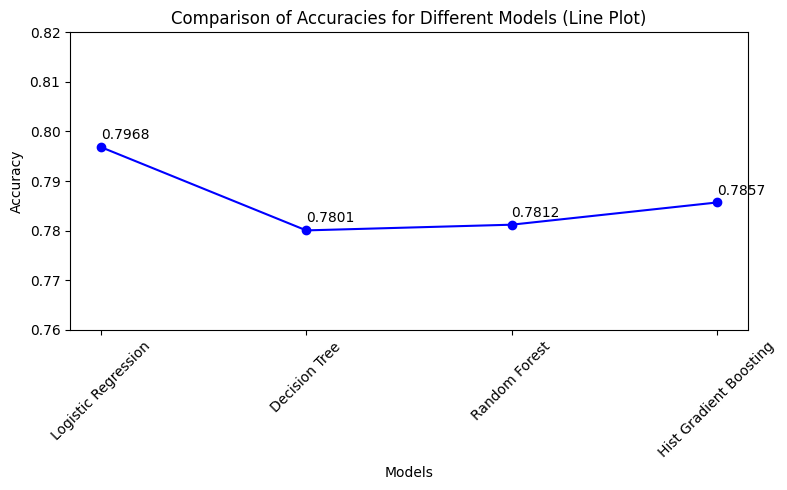

In [53]:
# Plotting the data using line plot
plt.figure(figsize=(8, 5))
plt.plot(model_names, model_accuracies, marker='o', linestyle='-', color='blue')
for i, acc in enumerate(model_accuracies):
    plt.text(i, acc + 0.001, f'{acc:.4f}', ha='left', va='bottom')
    
plt.title('Comparison of Accuracies for Different Models (Line Plot)')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0.76,0.82)
plt.xticks(rotation=45)
# plt.grid(True)
plt.tight_layout()
plt.show()

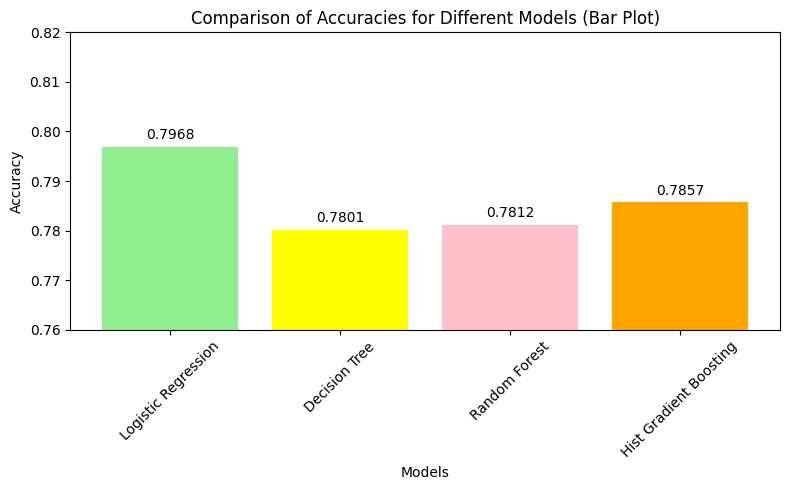

In [54]:
# Plotting the data using bar plot
plt.figure(figsize=(8, 5))
colors = ['lightgreen', 'yellow', 'pink', 'orange']
plt.bar(model_names, model_accuracies, color=colors)
for i, acc in enumerate(model_accuracies):
    plt.text(i, acc + 0.001, f'{acc:.4f}', ha='center', va='bottom')
    
plt.title('Comparison of Accuracies for Different Models (Bar Plot)')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0.76,0.82)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Creating DataFrames for predicted survival outcomes of passengers by different models.  Each DataFrame contains PassengerID and the corresponding predicted survival outcomes


In [55]:
passengerID = test.PassengerId

df_lr = pd.DataFrame({"PassengerID":passengerID, "Survived": y_pred_lr})
df_dt = pd.DataFrame({"PassengerID":passengerID, "Survived": y_pred_dt}) 
df_rf = pd.DataFrame({"PassengerID":passengerID, "Survived": y_pred_rf})
df_hg = pd.DataFrame({"PassengerID":passengerID, "Survived": y_pred_hg})

# print(df_lr,df_dt,df_rf,df_hg)


### 8. Conclusion:

<details>
<summary> Explanation for the initial accuracy scores. </summary>
<p>
The provided accuracy scores reflect the performance of multiple classifiers (Logistic Regression, Decision Tree Classifier, Random Forest Classifier, and Hist Gradient Boosting Classifier) in a specific task, where accuracy measures the ratio of correctly predicted instances to the total instances in the dataset, represented as a percentage.



- Logistic Regression Accuracy: 79.6849%

- Decision Tree Classifier Accuracy: 78.2292%

- Random Forest Classifier Accuracy: 78.3441%

- Hist Gradient Boosting Classifier Accuracy: 77.5576%



These accuracy scores denote the effectiveness of each model in making accurate predictions. A higher accuracy score signifies a better ability of the model to correctly classify instances within the dataset.
</p>
</details>

<details> 

  <summary> Why Logistic Regression outperformed the other classifiers? </summary>

  <p>

Logistic Regression, being a linear model, might have performed better in this specific scenario due to several factors: linearity in data, less prone to overfitting, and better handli of irrelevant features. 

  </p>

</details>



<details> 

  <summary> Breakdown of its key performance metrics. </summary>

  <p> 
- Accuracy: 0.7968

This metric denotes the proportion of correct predictions made by the model, amounting to approximately 79.68% of accurate predictions.



- F1 Score: 0.7266

The F1 score harmonizes precision and recall, offering a balanced view of the model's performance. With an F1 score around 0.73, this model demonstrates a reasonably balanced tradeoff between precision and recall.



- Precision: 0.7521

Precision measures the accuracy of positive predictions, revealing the model's ability to avoid false positives. At about 75.21%, this Logistic Regression model showcases a favorable precision rate.



- Recall: 0.7046

Recall (or sensitivity) highlights the model's capability to identify relevant instances among actual positives. Achieving a recall rate of approximately 70.46%, this model demotrates an ability to capture relevant instances effectively.
  </p>

</details>

In summary, the Logistic Regression model exhibits the highest accuracy and maintains a reasonably balanced F1 score, precision, and recall, solidifying its position as the most effective classifier among the considered models.